In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 


In [3]:
df1=pd.read_csv("/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv")

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

**Drop features that are not required to build our model**

In [6]:
df2=df1.drop(["availability","society","balcony"],axis="columns")
df2.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
df2.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

FEATURE ENGINEERING

ADDING NEW COLUMN FOR BHK IN INTEGER

In [10]:
df3["BHK"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))

/tmp/ipykernel_19/986678422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"]=df3["size"].apply(lambda x: int(x.split(" ")[0]))


In [11]:
df3.head()

,area_type,location,size,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df4=df3.drop(["size"],axis="columns")
df4.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft             2100 - 2850
bath                           4.0
price                        186.0
BHK                              4
Name: 30, dtype: object

since total_sqft contains some values in range like 2100-2850 so we take a average of it and replace that value

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df4[df4["total_sqft"].apply(is_float)].head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [14]:
df4[~df4["total_sqft"].apply(is_float)].head()

,area_type,location,total_sqft,bath,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2


In [15]:
def range_convert(x):
    lis=x.split("-")
    if(len(lis)==2):
        return (float(lis[0])+float(lis[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df5=df4.copy()
df5["total_sqft"]=df5["total_sqft"].apply(range_convert)
df5[df5["total_sqft"].apply(is_float)].head()

,area_type,location,total_sqft,bath,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


since there are cases like its written in total_sqft 34.4sqfeet there are few values and we place none values there so either we drop those rows or convert those values

In [17]:
df5.isnull().sum()

area_type      0
location       0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

since there are only 46 of those value and number of rows are large so we can drop it for simplicity

In [18]:
df5.dropna(inplace=True)
df5.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

**Add new feature called price per square feet**

In [19]:
df6 = df5.copy()
df6['price_per_sqft'] = df6['price']*100000/df5['total_sqft']
df6.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [20]:
df6['price_per_sqft'].describe()


count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [21]:
location_stats=df6.location.value_counts()
location_stats

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [22]:
len(location_stats[location_stats>10])

240

In [23]:
len(location_stats[location_stats<10])

1045

Dimensionality reduction by changing location_stats<10 values in other

In [24]:
loc_less_than_10=location_stats[location_stats<10]
df6["location"]=df6.location.apply(lambda x: "other" if x in loc_less_than_10 else x)
df6.head(10)

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,Plot Area,other,1020.0,6.0,370.00,6,36274.509804


OUTLIERS REMOVAL USING BUSINESS LOGIC

1.As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [25]:
df6[df6["total_sqft"]/df6["BHK"]<300]


,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
9,Plot Area,other,1020.0,6.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Plot Area,other,1350.0,7.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Plot Area,other,1400.0,7.0,218.0,7,15571.428571
13279,Plot Area,other,1200.0,5.0,130.0,6,10833.333333
13281,Plot Area,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


so above dataframe contains all outliers so we will remove all these rows

In [26]:
df7=df6[df6["total_sqft"]/df6["BHK"]>=300]
df7.shape

(12456, 7)

2.Outliers removal using Standard deviation and mean

In [27]:
df7["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [28]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df8 = remove_outliers(df7)
df8.shape

(10226, 7)

3.Outliers removal for same location where 2 bhk has greater price as compared to 3bhk

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

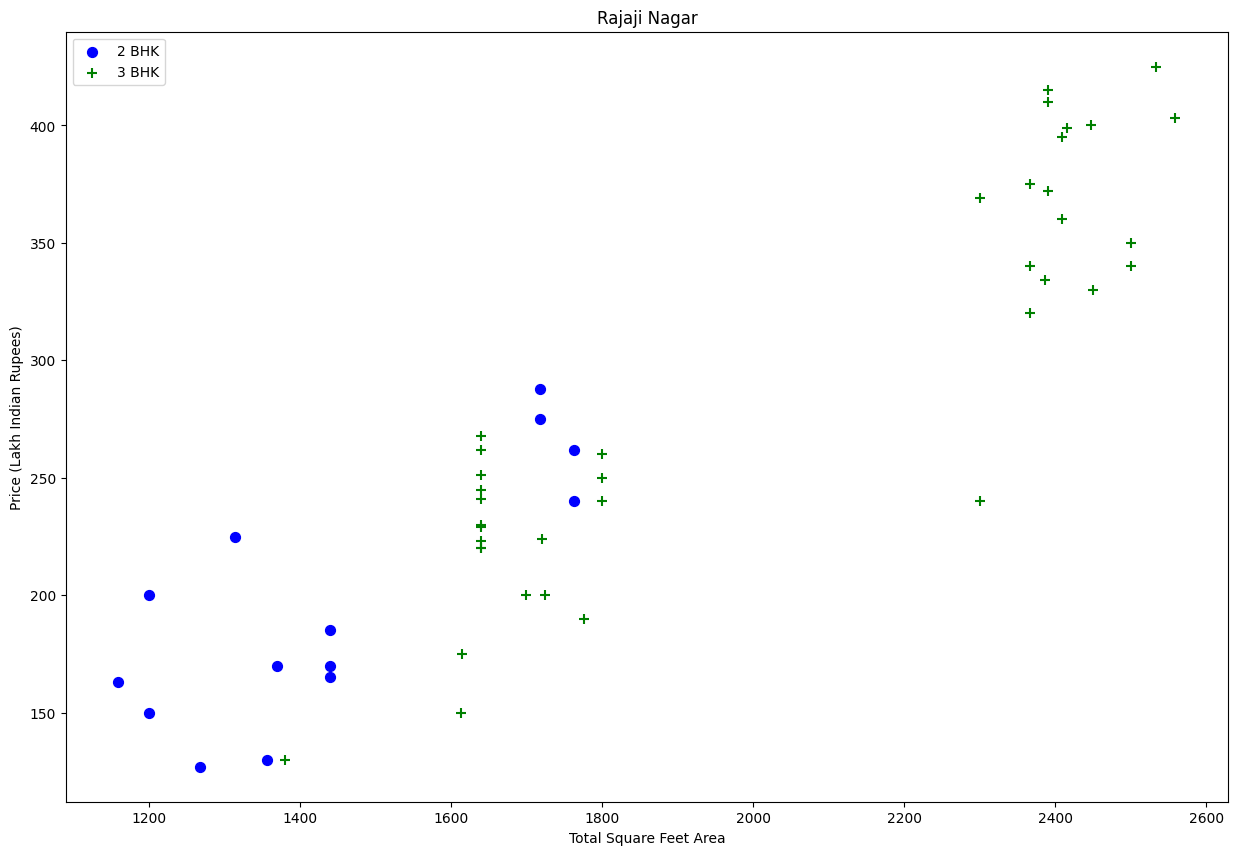

In [29]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

In the graph we clearly see that blue marker at some places has higher prices as compared to green markers

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [30]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df9 = remove_bhk_outliers(df8)
df9.shape

(7380, 7)

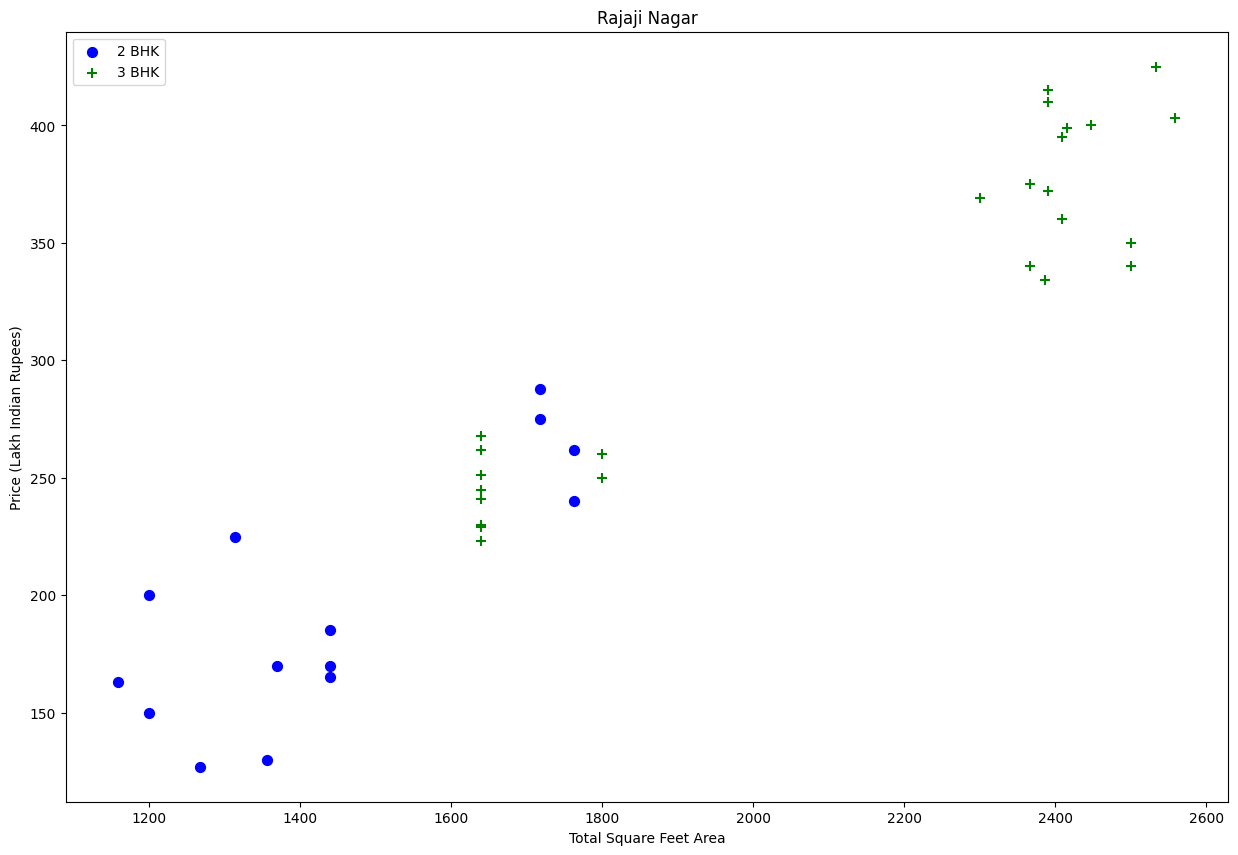

In [31]:
plot_scatter_chart(df9,"Rajaji Nagar")

Text(0, 0.5, 'Count')

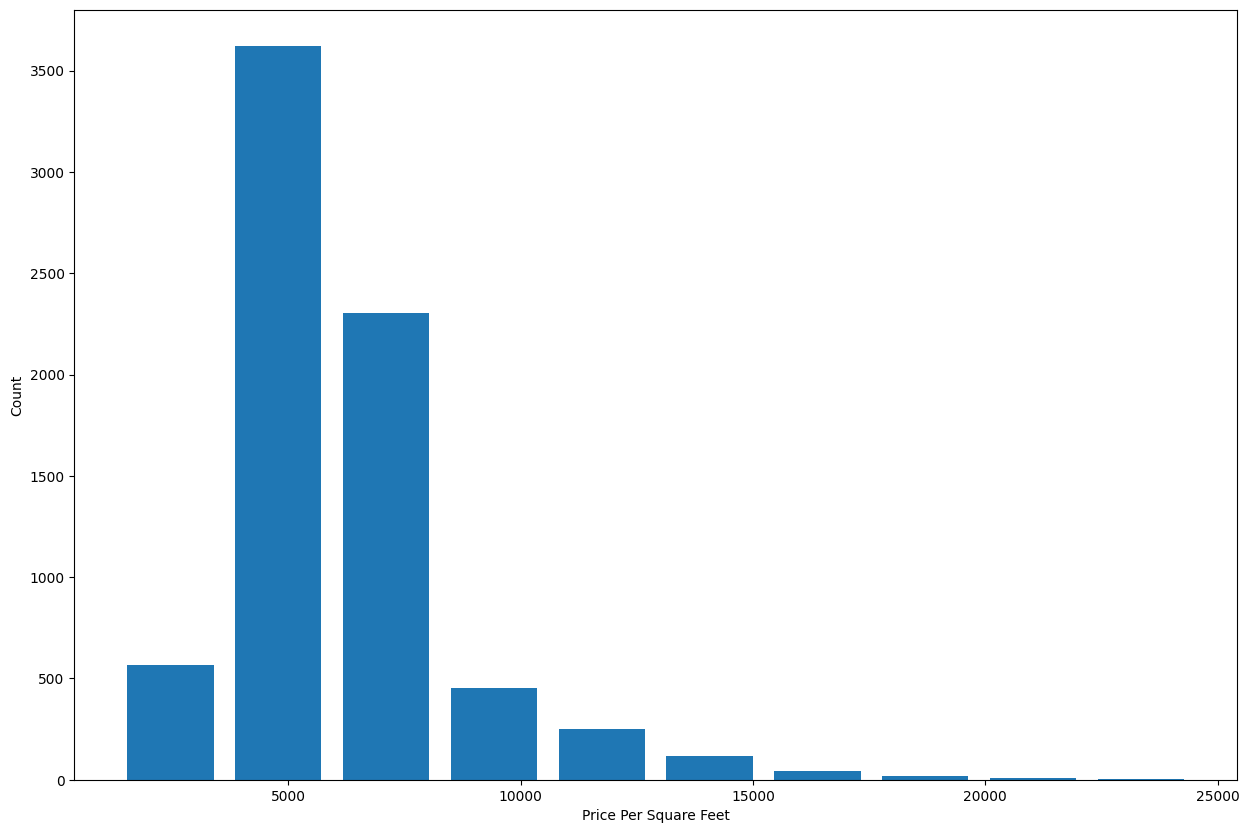

In [32]:
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

we can see that our price per sq feet is normally distributed now

4. Outliers removal for bathrooms 

In [33]:
df9.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

we can see clearly that bath columns also contains higher values like 16 and 13 which is clearly some outliers

Suppose It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [34]:
df9[df9["bath"]>df9["BHK"]+2]

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
597,Plot Area,BTM 1st Stage,3300.0,14.0,500.0,9,15151.515152
1653,Built-up Area,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5299,Built-up Area,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6776,Super built-up Area,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8465,Super built-up Area,other,11338.0,9.0,1000.0,6,8819.897689


we can see above all are outliers as bathrooms are greater than bhk+2

In [35]:
df10=df9[df9["bath"]<df9["BHK"]+2]
df10.shape

(7302, 7)

In [36]:
df10.head()

,area_type,location,total_sqft,bath,price,BHK,price_per_sqft
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Plot Area,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [37]:
df10.area_type.value_counts()

area_type
Super built-up  Area    5322
Built-up  Area          1323
Plot  Area               614
Carpet  Area              43
Name: count, dtype: int64

In [38]:
df10.drop(["price_per_sqft"],axis="columns",inplace=True)


/tmp/ipykernel_19/480199348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10.drop(["price_per_sqft"],axis="columns",inplace=True)


In [39]:
df10.head()

,area_type,location,total_sqft,bath,price,BHK
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Plot Area,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,43.0,2


now we need to use one hot encoding to convert area_type column and location column

In [40]:
dummies1=pd.get_dummies(df10.area_type,dtype=int)
#dummies1.drop("Plot Area",axis="columns")
dummies1.columns
dummies1.drop('Carpet  Area',axis="columns",inplace=True)
dummies1

,Built-up Area,Plot Area,Super built-up Area
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
10217,0,0,0
10218,0,0,1
10221,0,0,1
10222,0,1,0


In [41]:
dummies2=pd.get_dummies(df10.location,dtype=int)
dummies2.drop('other',axis="columns",inplace=True)
dummies2

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df11=pd.concat([df10,dummies1,dummies2],axis="columns")
df11

,area_type,location,total_sqft,bath,price,BHK,Built-up Area,Plot Area,Super built-up Area,Devarachikkanahalli,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Super built-up Area,Devarachikkanahalli,1250.0,2.0,40.0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Plot Area,Devarachikkanahalli,1200.0,2.0,83.0,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,Devarachikkanahalli,1170.0,2.0,40.0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Devarachikkanahalli,1425.0,2.0,65.0,3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,Super built-up Area,Devarachikkanahalli,947.0,2.0,43.0,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,Carpet Area,other,1200.0,2.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,Super built-up Area,other,1800.0,1.0,200.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10221,Super built-up Area,other,1353.0,2.0,110.0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10222,Plot Area,other,812.0,1.0,26.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df12=df11.drop(['area_type','location'],axis="columns")
df12

,total_sqft,bath,price,BHK,Built-up Area,Plot Area,Super built-up Area,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,1800.0,1.0,200.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10221,1353.0,2.0,110.0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,812.0,1.0,26.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


DATA CLEANING,FEATURE ENGINEERING,DIMENSIONALITY REDUCTION,OUTLIERES REMOVAL DONE

NOW TO MACHINE LEARNING MODEL

In [44]:
X=df12.drop('price',axis="columns")
X

,total_sqft,bath,BHK,Built-up Area,Plot Area,Super built-up Area,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,1800.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10221,1353.0,2.0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,812.0,1.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y=df12['price']
Y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10217     70.0
10218    200.0
10221    110.0
10222     26.0
10225    400.0
Name: price, Length: 7302, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)

In [48]:
X_train.shape

(5841, 259)

In [49]:
X_test.shape

(1461, 259)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lr=LinearRegression()
Dt=DecisionTreeRegressor()
RF=RandomForestRegressor()
Dt.fit(X_train,Y_train)
lr.fit(X_train,Y_train)
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [51]:
lr.score(X_test,Y_test)

0.8573384901650305

In [52]:
Dt.score(X_test,Y_test)

0.7237393221894577

In [53]:
RF.score(X_test,Y_test)

0.8121403928205089

using k fold 

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

linear_r=cross_val_score(LinearRegression(), X, Y, cv=cv)
D_T=cross_val_score(DecisionTreeRegressor(), X, Y, cv=cv)
R_F=cross_val_score(RandomForestRegressor(), X, Y, cv=cv)

In [55]:
linear_r

array([0.84392129, 0.82981495, 0.83594621, 0.85038042, 0.8108817 ])

In [56]:
D_T

array([0.54980343, 0.70338865, 0.75484118, 0.77175436, 0.60806945])

In [57]:
R_F

array([0.71676672, 0.78371857, 0.83051372, 0.85463952, 0.68603572])

We can clearly see that for all 5 splits we are getting consistent or better score for linear regression

FINDING BEST MODEL USING GRID SEARCH CV

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators': [10, 50, 100, 200],
                'max_depth': [None, 5, 10, 20]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

#find_best_model_using_gridsearchcv(X,Y)

looking into above table we can see linear regression and random forest did really well

In [59]:
finallr=LinearRegression()
finallr.fit(X_train,Y_train)
finallr.score(X_test,Y_test)

0.8573384901650305

In [60]:
import joblib
joblib.dump(finallr, 'our_estimator.joblib')

['our_estimator.joblib']

In [61]:
model=joblib.load('our_estimator.joblib')

In [62]:
def predict_price(area_type,location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]
    type_index = np.where(X.columns == area_type)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    if type_index >= 0:
        x[type_index] = 1
    return finallr.predict([x])


In [63]:
X.columns

Index(['total_sqft', 'bath', 'BHK', 'Built-up  Area', 'Plot  Area',
       'Super built-up  Area', ' Devarachikkanahalli', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=259)

In [64]:
predict_price('Built-up  Area','Indira Nagar',1000, 3, 3)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([184.07550296])